In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn . preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from sklearn . linear_model import LogisticRegression

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df1=pd.read_csv(url,header = None)
df1.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df1.columns = ["Variance","Skewness","Curtosis","Entropy","Class"]

In [4]:
df1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df1.loc[:,"Color"] = 0

In [6]:
df1.loc[(df1.Class == 0),"Color"] = "Green"
df1.loc[(df1.Class == 1),"Color"] = "Red"

In [7]:
df1.groupby(df1['Class'])["Variance","Skewness","Curtosis","Entropy"].mean()

<ipython-input-7-4a3e00fd1047>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(df1['Class'])["Variance","Skewness","Curtosis","Entropy"].mean()


,Variance,Skewness,Curtosis,Entropy
Class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [8]:
df1.groupby(df1['Class'])["Variance","Skewness","Curtosis","Entropy"].std()

<ipython-input-8-c556743981c7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(df1['Class'])["Variance","Skewness","Curtosis","Entropy"].std()


,Variance,Skewness,Curtosis,Entropy
Class,,,,
0,2.019348,5.138792,3.239894,2.125077
1,1.881183,5.404884,5.261811,2.070984


In [9]:
df1.mean()

Variance    0.433735
Skewness    1.922353
Curtosis    1.397627
Entropy    -1.191657
Class       0.444606
dtype: float64

In [10]:
df1.std()

Variance    2.842763
Skewness    5.869047
Curtosis    4.310030
Entropy     2.101013
Class       0.497103
dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df1, df1, test_size=0.5)

In [14]:
for i in X_train:
    X_train_0 = X_train.loc[X_train["Class"] == 0]
    X_train_1 = X_train.loc[X_train["Class"] == 1]

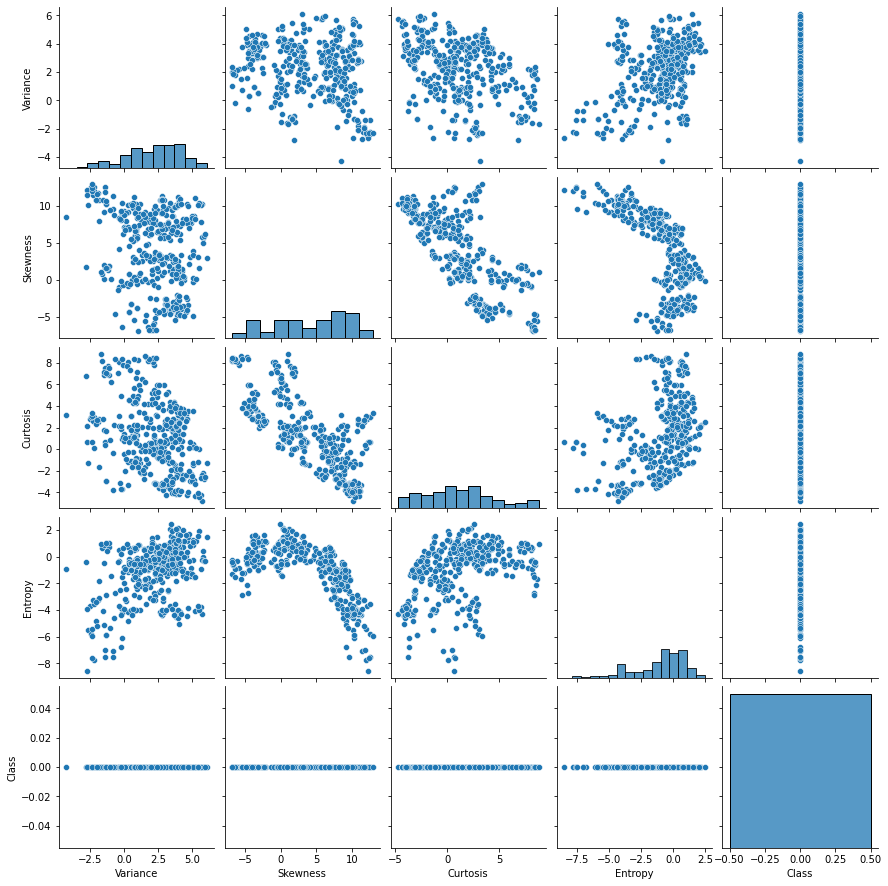

In [15]:
sns.pairplot(X_train_0)

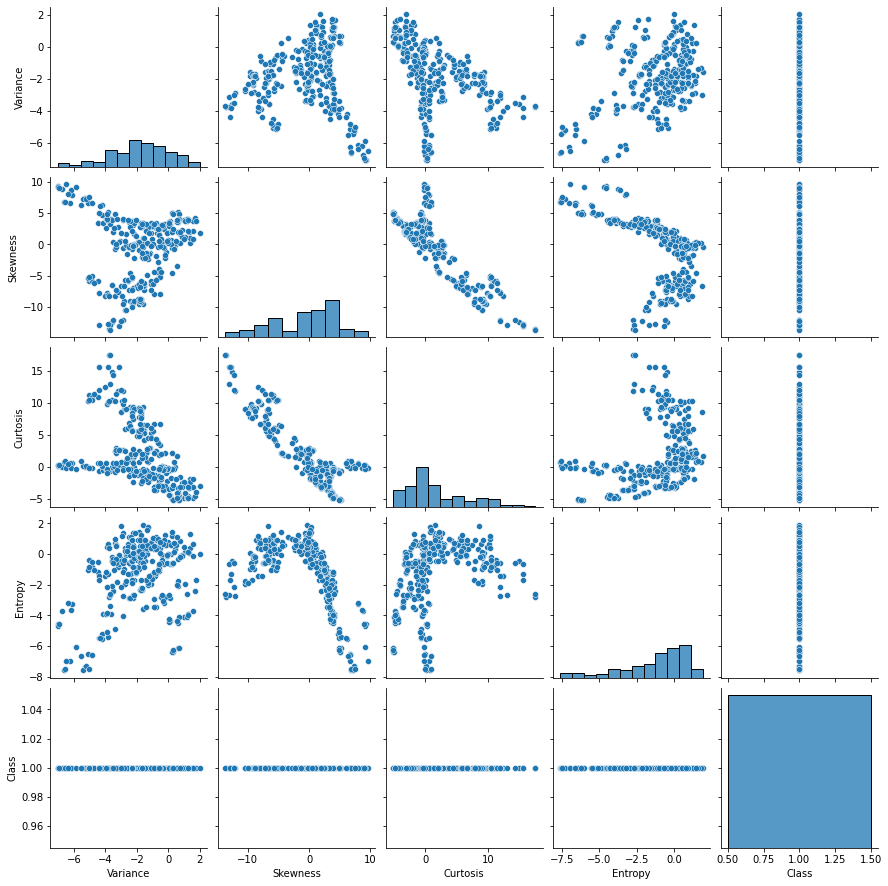

In [16]:
sns.pairplot(X_train_1)

In [26]:
X_test.loc[:,"Predict"] = 0
X_test

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Variance,Skewness,Curtosis,Entropy,Class,Color,Predict
615,-0.2062,9.22070,-3.70440,-6.810300,0,Green,0
653,3.3577,-4.30620,6.02410,0.182740,0,Green,0
977,-1.2390,-6.54100,4.81510,-0.033204,1,Red,0
1356,-4.0786,2.92390,0.87026,-0.653890,1,Red,0
923,0.4283,-0.94981,-1.07310,0.321100,1,Red,0
...,...,...,...,...,...,...,...
1161,0.7049,0.17174,-1.78590,0.361190,1,Red,0
1147,-1.6988,-7.11630,5.79020,0.167230,1,Red,0
163,2.4008,9.35930,-3.35650,-3.352600,0,Green,0
1333,-2.8619,4.51930,-0.58123,-4.262900,1,Red,0


In [28]:
X_test.loc[((X_test.Variance > 4) & (X_test.Skewness > 8) & (X_test.Curtosis < 25 )), 'Predict'] = 'Green'
X_test.loc[(X_test.Predict == 0), 'Predict'] = 'Red'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
df1 = X_test.loc[X_test['Predict'] == "Green"]
df1.reset_index(drop=True, inplace=True)
df1

,Variance,Skewness,Curtosis,Entropy,Class,Color,Predict
0,4.0713,10.4023,-4.1722,-4.75820,0,Green,Green
1,4.8368,10.0132,-4.3239,-4.32760,0,Green,Green
2,5.4380,9.4669,-4.9417,-3.92020,0,Green,Green
3,4.0446,11.1741,-4.3582,-4.74010,0,Green,Green
4,4.6464,10.5326,-4.5852,-4.20600,0,Green,Green
5,6.5633,9.8187,-4.4113,-3.22580,0,Green,Green
6,5.0214,8.0764,-3.0515,-1.71550,0,Green,Green
7,4.2899,9.1814,-4.6067,-4.32630,0,Green,Green
8,4.0962,10.1891,-3.9323,-4.18270,0,Green,Green
9,4.1711,8.7220,-3.0224,-0.59699,0,Green,Green


In [32]:
df2 = X_test.loc[X_test['Predict'] == "Red"]
df2.reset_index(drop=True, inplace=True)
df2

,Variance,Skewness,Curtosis,Entropy,Class,Color,Predict
0,-0.2062,9.22070,-3.70440,-6.810300,0,Green,Red
1,3.3577,-4.30620,6.02410,0.182740,0,Green,Red
2,-1.2390,-6.54100,4.81510,-0.033204,1,Red,Red
3,-4.0786,2.92390,0.87026,-0.653890,1,Red,Red
4,0.4283,-0.94981,-1.07310,0.321100,1,Red,Red
...,...,...,...,...,...,...,...
656,0.7049,0.17174,-1.78590,0.361190,1,Red,Red
657,-1.6988,-7.11630,5.79020,0.167230,1,Red,Red
658,2.4008,9.35930,-3.35650,-3.352600,0,Green,Red
659,-2.8619,4.51930,-0.58123,-4.262900,1,Red,Red


In [33]:
Compare1 = np.where(df1["Color"] == df1["Predict"], True, False)
Compare2 = np.where(df2["Color"] == df2["Predict"], True, False)

In [34]:
TP = sum(Compare1)
FP = len(Compare1) - TP
TN = sum(Compare2)
FN = len(Compare2) - TN


In [35]:
print("TP:",TP,"FP:",FP,"TN:",TN,"FN:",FN)

TP: 25 FP: 0 TN: 316 FN: 345


In [36]:
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)

In [37]:
print("TPR:",TPR,"TNR:",TNR)

TPR: 0.06756756756756757 TNR: 1.0


In [115]:
iris_feature_names = ["Variance","Skewness","Curtosis","Entropy"]
data = pd. read_csv (url , names =[ "Variance","Skewness","Curtosis","Entropy","Color"])
class_labels = data["Color"]
X = data[iris_feature_names]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( data["Color"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate.append(np. mean( prediction))

Text(0, 0.5, 'Error Rate ')

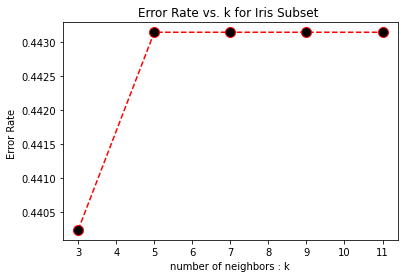

In [116]:
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")

Text(0, 0.5, 'Error Rate ')

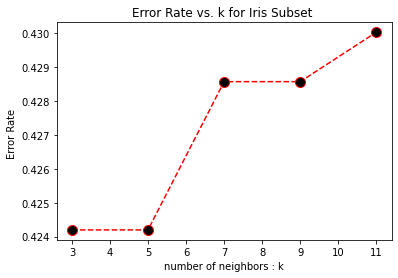

In [131]:
#omitted feature "Variance"
iris_feature_names_2 = ["Skewness","Curtosis","Entropy"]
X = data[iris_feature_names_2]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( data["Color"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate_2 = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate_2.append(np. mean( prediction))
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate_2 , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")

Text(0, 0.5, 'Error Rate ')

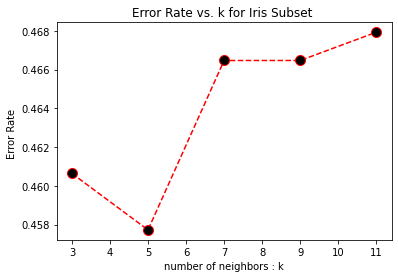

In [132]:
#omitted feature "Skewness"
iris_feature_names_3 = ["Variance","Curtosis","Entropy"]
X = data[iris_feature_names_3]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( data["Color"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate_3 = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate_3.append(np. mean( prediction))
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate_3 , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")

Text(0, 0.5, 'Error Rate ')

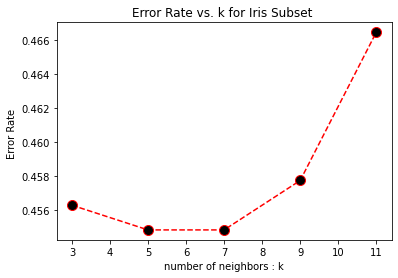

In [133]:
#omitted feature "Curtosis"
iris_feature_names_4 = ["Variance","Skewness","Entropy"]
X = data[iris_feature_names_4]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( data["Color"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate_4 = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate_4.append(np. mean( prediction))
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate_4 , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")

Text(0, 0.5, 'Error Rate ')

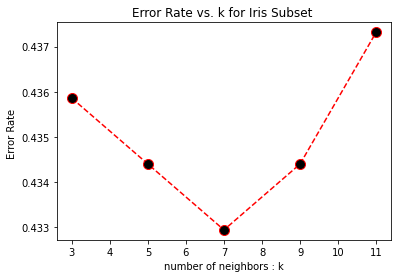

In [134]:
#omitted feature "Entropy"
iris_feature_names_4 = ["Variance","Skewness","Curtosis"]
X = data[iris_feature_names_4]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( data["Color"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate_5 = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate_5.append(np. mean( prediction))
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate_5 , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")

In [145]:
features = ["Variance","Skewness","Curtosis","Entropy"]

X = data[features]. values
le = LabelEncoder ()
Y = le.fit_transform ( data ["Color"].values )
X_train ,X_test ,Y_train ,Y_test = train_test_split (X, Y, test_size =0.5 , random_state =3)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit(X_train, Y_train )
prediction = log_reg_classifier . predict ( X_test )
accuracy = np.mean( prediction == Y_test )
accuracy

0.9912536443148688

In [151]:
Table1 = np.where(prediction == Y_test, True, False)


In [166]:
TP = np.sum(Table1 != 0)
FP = np.sum(Table1 == 0)


In [167]:
features = ["Skewness","Curtosis","Entropy"]

X = data[features]. values
le = LabelEncoder ()
Y = le.fit_transform ( data ["Color"].values )
X_train ,X_test ,Y_train ,Y_test = train_test_split (X, Y, test_size =0.5 , random_state =3)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit(X_train, Y_train )
prediction = log_reg_classifier . predict ( X_test )
accuracy = np.mean( prediction == Y_test )
accuracy

0.8017492711370262

In [168]:
features = ["Variance","Curtosis","Entropy"]

X = data[features]. values
le = LabelEncoder ()
Y = le.fit_transform ( data ["Color"].values )
X_train ,X_test ,Y_train ,Y_test = train_test_split (X, Y, test_size =0.5 , random_state =3)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit(X_train, Y_train )
prediction = log_reg_classifier . predict ( X_test )
accuracy = np.mean( prediction == Y_test )
accuracy

0.8994169096209913

In [169]:
features = ["Variance","Skewness","Entropy"]

X = data[features]. values
le = LabelEncoder ()
Y = le.fit_transform ( data ["Color"].values )
X_train ,X_test ,Y_train ,Y_test = train_test_split (X, Y, test_size =0.5 , random_state =3)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit(X_train, Y_train )
prediction = log_reg_classifier . predict ( X_test )
accuracy = np.mean( prediction == Y_test )
accuracy

0.8760932944606414

In [170]:
features = ["Variance","Skewness","Curtosis"]

X = data[features]. values
le = LabelEncoder ()
Y = le.fit_transform ( data ["Color"].values )
X_train ,X_test ,Y_train ,Y_test = train_test_split (X, Y, test_size =0.5 , random_state =3)
log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit(X_train, Y_train )
prediction = log_reg_classifier . predict ( X_test )
accuracy = np.mean( prediction == Y_test )
accuracy

0.9912536443148688